In [1]:
import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

Using TensorFlow backend.


2.0.5
0.19.1
2.0.0
1.13.0


In [2]:
# Local files
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

# Data

### Config

In [73]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/trained_models/5.0-as-binary_classifier/'

In [74]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/turbine_classifier/train/50x50'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/turbine_classifier/validate/50x50/'

In [75]:
input_shape = (50, 50, 1)
num_classes = 1

### Convert tif2png

Done in 1.1-mph_as_kd-baseline-simple_CNN_from_scratch.ipynb

### Create Generators

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255, )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')

Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


# Experiments

## simple/baseline model (3 layers, no regularisation)

In [12]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
__________

In [14]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.3257 - acc: 0.8729 - val_loss: 0.2315 - val_acc: 0.9316
Epoch 2/2
100/100 [==============================] - 11s - loss: 0.2011 - acc: 0.9284 - val_loss: 0.1805 - val_acc: 0.9416


In [15]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 11s - loss: 0.1532 - acc: 0.9494 - val_loss: 0.2937 - val_acc: 0.9449
Epoch 2/5
100/100 [==============================] - 13s - loss: 0.1446 - acc: 0.9515 - val_loss: 0.4490 - val_acc: 0.8230
Epoch 3/5
100/100 [==============================] - 13s - loss: 0.1185 - acc: 0.9589 - val_loss: 0.2916 - val_acc: 0.9165
Epoch 4/5
100/100 [==============================] - 12s - loss: 0.1070 - acc: 0.9594 - val_loss: 0.3027 - val_acc: 0.9264
Epoch 5/5
100/100 [==============================] - 11s - loss: 0.1111 - acc: 0.9585 - val_loss: 0.1896 - val_acc: 0.9482


In [16]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 10s - loss: 0.0526 - acc: 0.9800 - val_loss: 0.1681 - val_acc: 0.9533
Epoch 2/3
100/100 [==============================] - 13s - loss: 0.0562 - acc: 0.9769 - val_loss: 0.1480 - val_acc: 0.9549
Epoch 3/3
100/100 [==============================] - 14s - loss: 0.0408 - acc: 0.9855 - val_loss: 0.1621 - val_acc: 0.9616


In [17]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 10s - loss: 0.0502 - acc: 0.9809 - val_loss: 0.1773 - val_acc: 0.9565
Epoch 2/3
100/100 [==============================] - 11s - loss: 0.0462 - acc: 0.9825 - val_loss: 0.1396 - val_acc: 0.9583
Epoch 3/3
100/100 [==============================] - 11s - loss: 0.0503 - acc: 0.9795 - val_loss: 0.1620 - val_acc: 0.9516


In [18]:
lr = 0.00001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 11s - loss: 0.0463 - acc: 0.9849 - val_loss: 0.1548 - val_acc: 0.9516
Epoch 2/3
100/100 [==============================] - 11s - loss: 0.0404 - acc: 0.9839 - val_loss: 0.1392 - val_acc: 0.9549: 2s - lo - ETA: 0s - loss: 0.0406 - acc: 0.98
Epoch 3/3
100/100 [==============================] - 11s - loss: 0.0365 - acc: 0.9875 - val_loss: 0.1667 - val_acc: 0.9582


# Data augmentation 

In [61]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  horizontal_flip = True
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')



Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


## Augmentation parameters notes
    - rotation_range (0 to 180): performs poorly, struggles to reach 80% accuracy on training set and underfits
    - vertical_flip (True): also not great, stalls around 70% accuracy on training set
    - horizontal_flip (True): excellent! ... although, it seems a model with *no* augmentations also hits 97.5% quite quickly...
    - width_shift_range, height_shift_range: very slow to exceed 60% on training set

In [62]:

classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
__________

In [64]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 15s - loss: 0.4437 - acc: 0.8369 - val_loss: 0.3890 - val_acc: 0.8982
Epoch 2/2
100/100 [==============================] - 12s - loss: 0.2904 - acc: 0.9028 - val_loss: 0.3666 - val_acc: 0.8664


In [65]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 12s - loss: 0.2387 - acc: 0.9148 - val_loss: 0.2458 - val_acc: 0.9466
Epoch 2/5
100/100 [==============================] - 12s - loss: 0.2036 - acc: 0.9293 - val_loss: 0.2379 - val_acc: 0.9249.2410 - a - ETA: 5s - loss: 0.2260 - acc:  - ETA: 4s - l - ETA: 1s - loss: 0.2063 
Epoch 3/5
100/100 [==============================] - 11s - loss: 0.1754 - acc: 0.9351 - val_loss: 0.2064 - val_acc: 0.9399
Epoch 4/5
100/100 [==============================] - 12s - loss: 0.1845 - acc: 0.9438 - val_loss: 0.1719 - val_acc: 0.9448
Epoch 5/5
100/100 [==============================] - 12s - loss: 0.1351 - acc: 0.9496 - val_loss: 0.2694 - val_acc: 0.9316


In [66]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 11s - loss: 0.1503 - acc: 0.9485 - val_loss: 0.1506 - val_acc: 0.9533
Epoch 2/5
100/100 [==============================] - 11s - loss: 0.1313 - acc: 0.9505 - val_loss: 0.2374 - val_acc: 0.9249.9
Epoch 3/5
100/100 [==============================] - 11s - loss: 0.1239 - acc: 0.9599 - val_loss: 0.1486 - val_acc: 0.9549
Epoch 4/5
100/100 [==============================] - 12s - loss: 0.1152 - acc: 0.9600 - val_loss: 0.2089 - val_acc: 0.9516
Epoch 5/5
100/100 [==============================] - 11s - loss: 0.1099 - acc: 0.9585 - val_loss: 0.1498 - val_acc: 0.9466


In [67]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 13s - loss: 0.0671 - acc: 0.9770 - val_loss: 0.1716 - val_acc: 0.9516
Epoch 2/5
100/100 [==============================] - 11s - loss: 0.0625 - acc: 0.9774 - val_loss: 0.1461 - val_acc: 0.9548: 0s - loss: 0.0599 - acc: 
Epoch 3/5
100/100 [==============================] - 11s - loss: 0.0590 - acc: 0.9800 - val_loss: 0.1438 - val_acc: 0.9516.9
Epoch 4/5
100/100 [==============================] - 11s - loss: 0.0611 - acc: 0.9768 - val_loss: 0.1317 - val_acc: 0.9633
Epoch 5/5
100/100 [==============================] - 12s - loss: 0.0529 - acc: 0.9810 - val_loss: 0.1504 - val_acc: 0.9533s - loss: 0.0491 - acc: 0.98


In [68]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 11s - loss: 0.0516 - acc: 0.9830 - val_loss: 0.1454 - val_acc: 0.9533
Epoch 2/5
100/100 [==============================] - 11s - loss: 0.0564 - acc: 0.9795 - val_loss: 0.1682 - val_acc: 0.9565 ETA: 8s - - ETA: 5s -  - ETA: 3s - los - ETA: 0s - loss: 0.0563 - acc:
Epoch 3/5
100/100 [==============================] - 11s - loss: 0.0457 - acc: 0.9819 - val_loss: 0.1492 - val_acc: 0.9533
Epoch 4/5
100/100 [==============================] - 11s - loss: 0.0480 - acc: 0.9845 - val_loss: 0.1548 - val_acc: 0.9599
Epoch 5/5
100/100 [==============================] - 11s - loss: 0.0566 - acc: 0.9810 - val_loss: 0.1457 - val_acc: 0.9532


# Horizontal flip

In [78]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  horizontal_flip = True
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')


Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [76]:

# With data augmentation?
classifier_input = Input(shape=input_shapeape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 9216)              0         
__________

In [77]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 21s - loss: 3.3670 - acc: 0.7031 - val_loss: 2.7359 - val_acc: 0.8147
Epoch 2/2
100/100 [==============================] - 21s - loss: 4.6702 - acc: 0.7009 - val_loss: 8.0994 - val_acc: 0.4975


# More Layers + dropout
Note: adding dropout (of whatever value for p) doesn't seem to help much - p = 0.3 


In [76]:

train_datagen = ImageDataGenerator(rescale=1./255
                                  )

test_datagen = ImageDataGenerator(rescale=1./255
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')

Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [92]:
p = 0.3
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(3,3,3, border_mode='same')(x)
x = Dropout(p)(x)

x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_58 (Batc (None, 12, 12, 64)        256       
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), padding="same")`



In [94]:
lr = 0.01
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 20s - loss: 8.0571 - acc: 0.5001 - val_loss: 8.9067 - val_acc: 0.4474
Epoch 2/2
100/100 [==============================] - 20s - loss: 8.0913 - acc: 0.4980 - val_loss: 8.5981 - val_acc: 0.4666


In [ ]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

In [88]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 20s - loss: 1.1843 - acc: 0.9240 - val_loss: 1.0469 - val_acc: 0.9332
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.9541 - acc: 0.9359 - val_loss: 1.1619 - val_acc: 0.9231
Epoch 3/5
100/100 [==============================] - 20s - loss: 1.2411 - acc: 0.9188 - val_loss: 1.3336 - val_acc: 0.9132
Epoch 4/5
100/100 [==============================] - 20s - loss: 1.0973 - acc: 0.9270 - val_loss: 0.9836 - val_acc: 0.9366
Epoch 5/5
100/100 [==============================] - 20s - loss: 1.0124 - acc: 0.9331 - val_loss: 1.2159 - val_acc: 0.9215


In [82]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 44s - loss: 0.0253 - acc: 0.9905 - val_loss: 0.1226 - val_acc: 0.9683
Epoch 2/5
100/100 [==============================] - 42s - loss: 0.0074 - acc: 0.9975 - val_loss: 0.1323 - val_acc: 0.9716
Epoch 3/5
100/100 [==============================] - 43s - loss: 0.0092 - acc: 0.9980 - val_loss: 0.1122 - val_acc: 0.9716
Epoch 4/5
100/100 [==============================] - 42s - loss: 0.0089 - acc: 0.9974 - val_loss: 0.1365 - val_acc: 0.9749
Epoch 5/5
100/100 [==============================] - 44s - loss: 0.0059 - acc: 0.9980 - val_loss: 0.0986 - val_acc: 0.9766


In [83]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 43s - loss: 0.0071 - acc: 0.9975 - val_loss: 0.1278 - val_acc: 0.9750
Epoch 2/5
100/100 [==============================] - 43s - loss: 0.0051 - acc: 0.9990 - val_loss: 0.1314 - val_acc: 0.9750
Epoch 3/5
100/100 [==============================] - 44s - loss: 0.0023 - acc: 0.9990 - val_loss: 0.1292 - val_acc: 0.9800
Epoch 4/5
100/100 [==============================] - 43s - loss: 0.0044 - acc: 0.9990 - val_loss: 0.1530 - val_acc: 0.9682
Epoch 5/5
100/100 [==============================] - 43s - loss: 0.0033 - acc: 0.9990 - val_loss: 0.1150 - val_acc: 0.9833


In [84]:
model.save('/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/turbine_classifier/turbine_binary_dropout_p_0p3_model.h5')

# More layers, no augmentation - turbine

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')

Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [29]:
p = 0
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(3,3,3, border_mode='same')(x)
x = Dropout(p)(x)

x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_19 (Batc (None, 12, 12, 64)        256       
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), padding="same")`



In [30]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/2
100/100 [==============================] - 20s - loss: 0.3208 - acc: 0.8874 - val_loss: 0.6734 - val_acc: 0.4808
Epoch 2/2
100/100 [==============================] - 25s - loss: 0.1456 - acc: 0.9475 - val_loss: 0.6320 - val_acc: 0.5242


In [31]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 29s - loss: 0.1179 - acc: 0.9559 - val_loss: 0.3605 - val_acc: 0.8545
Epoch 2/5
100/100 [==============================] - 43s - loss: 0.0891 - acc: 0.9689 - val_loss: 0.2147 - val_acc: 0.9199
Epoch 3/5
100/100 [==============================] - 40s - loss: 0.0889 - acc: 0.9695 - val_loss: 0.0998 - val_acc: 0.9666
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0687 - acc: 0.9710 - val_loss: 0.1358 - val_acc: 0.9498
Epoch 5/5
100/100 [==============================] - 20s - loss: 0.0501 - acc: 0.9770 - val_loss: 0.1047 - val_acc: 0.9616


In [32]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 0.0386 - acc: 0.9870 - val_loss: 0.3639 - val_acc: 0.9082
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.0446 - acc: 0.9854 - val_loss: 0.1265 - val_acc: 0.9616
Epoch 3/5
100/100 [==============================] - 20s - loss: 0.0298 - acc: 0.9930 - val_loss: 0.1316 - val_acc: 0.9750
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0332 - acc: 0.9890 - val_loss: 0.1597 - val_acc: 0.9565
Epoch 5/5
100/100 [==============================] - 20s - loss: 0.0190 - acc: 0.9920 - val_loss: 0.1166 - val_acc: 0.9716


In [33]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 35s - loss: 0.0048 - acc: 0.9980 - val_loss: 0.1326 - val_acc: 0.9666
Epoch 2/5
100/100 [==============================] - 51s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1470 - val_acc: 0.9766
Epoch 3/5
100/100 [==============================] - 51s - loss: 4.8901e-04 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 0.9800
Epoch 4/5
100/100 [==============================] - 51s - loss: 4.4534e-04 - acc: 1.0000 - val_loss: 0.1372 - val_acc: 0.9732
Epoch 5/5
100/100 [==============================] - 50s - loss: 1.5490e-04 - acc: 1.0000 - val_loss: 0.1236 - val_acc: 0.9783


In [34]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 1.3475e-04 - acc: 1.0000 - val_loss: 0.1647 - val_acc: 0.9716
Epoch 2/5
100/100 [==============================] - 20s - loss: 6.1550e-05 - acc: 1.0000 - val_loss: 0.1762 - val_acc: 0.9783
Epoch 3/5
100/100 [==============================] - 20s - loss: 3.4565e-05 - acc: 1.0000 - val_loss: 0.1542 - val_acc: 0.9766
Epoch 4/5
100/100 [==============================] - 20s - loss: 2.0029e-05 - acc: 1.0000 - val_loss: 0.1780 - val_acc: 0.9783
Epoch 5/5
100/100 [==============================] - 20s - loss: 1.1744e-05 - acc: 1.0000 - val_loss: 0.1475 - val_acc: 0.9783


In [35]:
model.save('/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/turbine_classifier/turbine_binary_model.h5')

# Oil classifier


In [47]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/oil_and_gas_infrastructure_classifier/train/50x50'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/oil_and_gas_infrastructure_classifier/validate/50x50/'


In [48]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')

Found 1996 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [53]:
p = 0
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(3,3,3, border_mode='same')(x)
x = Dropout(p)(x)

x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_37 (Batc (None, 12, 12, 64)        256       
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), padding="same")`



In [55]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 0.3215 - acc: 0.8869 - val_loss: 0.9744 - val_acc: 0.3506
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.1669 - acc: 0.9345 - val_loss: 0.8207 - val_acc: 0.2638
Epoch 3/5
100/100 [==============================] - 19s - loss: 0.1110 - acc: 0.9610 - val_loss: 0.5398 - val_acc: 0.7140
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0816 - acc: 0.9705 - val_loss: 0.2143 - val_acc: 0.9533
Epoch 5/5
100/100 [==============================] - 19s - loss: 0.0631 - acc: 0.9805 - val_loss: 0.1715 - val_acc: 0.9482


In [56]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 0.0209 - acc: 0.9925 - val_loss: 0.1408 - val_acc: 0.9583
Epoch 2/5
100/100 [==============================] - 19s - loss: 0.0114 - acc: 0.9965 - val_loss: 0.1130 - val_acc: 0.9649
Epoch 3/5
100/100 [==============================] - 20s - loss: 0.0105 - acc: 0.9980 - val_loss: 0.1333 - val_acc: 0.9632
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0063 - acc: 0.9985 - val_loss: 0.1031 - val_acc: 0.9750
Epoch 5/5
100/100 [==============================] - 20s - loss: 0.0056 - acc: 0.9990 - val_loss: 0.1418 - val_acc: 0.9683


In [57]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 20s - loss: 0.0034 - acc: 0.9990 - val_loss: 0.1402 - val_acc: 0.9716
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.0028 - acc: 0.9995 - val_loss: 0.1442 - val_acc: 0.9716
Epoch 3/5
100/100 [==============================] - 19s - loss: 0.0025 - acc: 0.9995 - val_loss: 0.1688 - val_acc: 0.9666
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9750
Epoch 5/5
100/100 [==============================] - 19s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1853 - val_acc: 0.9649


In [58]:
model.save('/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/oil_and_gas_infrastructure_classifier/oil_binary_classifier.h5')

# Other

In [59]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/other_classifier/train/50x50'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/other_classifier/validate/50x50/'


In [60]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  )

test_datagen = ImageDataGenerator(rescale=1./255, 
                                 )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='binary',
        color_mode='grayscale')

Found 1988 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [66]:
p = 0.1
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(3,3,3, border_mode='same')(x)
x = Dropout(p)(x)

x = Flatten()(x)
x = Dense(num_classes, activation='sigmoid')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_43 (Batc (None, 12, 12, 64)        256       
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), padding="same")`



In [67]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 22s - loss: 0.5329 - acc: 0.7982 - val_loss: 0.6243 - val_acc: 0.7290
Epoch 2/5
100/100 [==============================] - 21s - loss: 0.2816 - acc: 0.8803 - val_loss: 0.5505 - val_acc: 0.8509
Epoch 3/5
100/100 [==============================] - 21s - loss: 0.2058 - acc: 0.9125 - val_loss: 0.5068 - val_acc: 0.7588
Epoch 4/5
100/100 [==============================] - 21s - loss: 0.1610 - acc: 0.9405 - val_loss: 0.2620 - val_acc: 0.9363
Epoch 5/5
100/100 [==============================] - 21s - loss: 0.1260 - acc: 0.9545 - val_loss: 0.1912 - val_acc: 0.9246


In [68]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 0.1203 - acc: 0.9533 - val_loss: 0.2970 - val_acc: 0.9125
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.1020 - acc: 0.9608 - val_loss: 1.4783 - val_acc: 0.5946
Epoch 3/5
100/100 [==============================] - 20s - loss: 0.0810 - acc: 0.9745 - val_loss: 0.1372 - val_acc: 0.9564
Epoch 4/5
100/100 [==============================] - 19s - loss: 0.0593 - acc: 0.9775 - val_loss: 0.0940 - val_acc: 0.9631
Epoch 5/5
100/100 [==============================] - 19s - loss: 0.0569 - acc: 0.9770 - val_loss: 0.1556 - val_acc: 0.9564


In [69]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 20s - loss: 0.0172 - acc: 0.9955 - val_loss: 0.1209 - val_acc: 0.9663
Epoch 2/5
100/100 [==============================] - 20s - loss: 0.0088 - acc: 0.9975 - val_loss: 0.1082 - val_acc: 0.9698
Epoch 3/5
100/100 [==============================] - 19s - loss: 0.0063 - acc: 0.9990 - val_loss: 0.1314 - val_acc: 0.9581
Epoch 4/5
100/100 [==============================] - 19s - loss: 0.0057 - acc: 0.9995 - val_loss: 0.0887 - val_acc: 0.9765
Epoch 5/5
100/100 [==============================] - 19s - loss: 0.0030 - acc: 0.9995 - val_loss: 0.1204 - val_acc: 0.9765


In [70]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)


Epoch 1/5
100/100 [==============================] - 19s - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2088 - val_acc: 0.9495
Epoch 2/5
100/100 [==============================] - 19s - loss: 0.0029 - acc: 0.9990 - val_loss: 0.1116 - val_acc: 0.9732
Epoch 3/5
100/100 [==============================] - 19s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1256 - val_acc: 0.9782
Epoch 4/5
100/100 [==============================] - 20s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1389 - val_acc: 0.9732
Epoch 5/5
100/100 [==============================] - 19s - loss: 9.9364e-04 - acc: 1.0000 - val_loss: 0.1216 - val_acc: 0.9749


In [71]:
model.save('/home/ubuntu/data/sar/experiment_crops_20170815/binary_experiments/other_classifier/other_classifier.h5')

### Lets visualise and evaluate/plot predictions

In [19]:
validation_generator.reset()

In [20]:
preds = model.predict_generator(validation_generator,50)
preds.shape

(499, 1)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
sorted(list(validation_generator.class_indices))

['other', 'turbine']

In [23]:
y_pred = np.argmax(preds, axis=1)

In [29]:
y_true = validation_generator.classes
labels = [0,1] # sorted(list(validation_generator.class_indices))
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)

[[249   0]
 [250   0]]


Confusion matrix, without normalization
[[249   0]
 [250   0]]


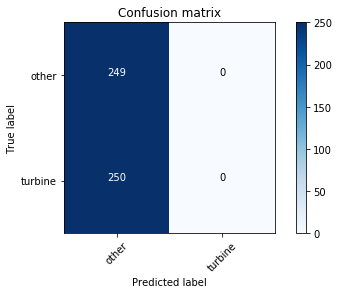

In [30]:
utils.plot_confusion_matrix(cm, sorted(list(validation_generator.class_indices)))

In [26]:
# Number false positives = sum vertical (non-diagonal) rows =
print "Number 'oil_and_gas_infrastructure' false positives = {}".format(sum(cm[1:,0]))
print "Number 'turbine' false positives = {}".format(sum(cm[:2,2]))

print "\n"

# Number false negatives = sum horizontal (non-diagonal) rows =
print "Number 'oil_and_gas_infrastructure' false negatives = {}".format(sum(cm[0, 1:]))
print "Number 'turbine' false negatives = {}".format(sum(cm[2, :2]))

Number 'oil_and_gas_infrastructure' false positives = 250
Number 'turbine' false positives = 0


Number 'oil_and_gas_infrastructure' false negatives = 0
Number 'turbine' false negatives = 0


In [31]:
# reduce filenames for kari_plot
short_validation_filenames = [name[-35:] for name in validation_generator.filenames]

In [32]:
utils.kari_plot(preds, short_validation_filenames)

IndexError: index 1 is out of bounds for axis 1 with size 1

We see good predictions on the whole:

 - Some actual `oil_and_gas_infrastructure` is being predicted as `other` (i.e. false negatives).
 - Some actual `turbine` is being predicted as `other` (i.e. false negatives).
 - Many `other` is being predicted as `turbine`/`oil_and_gas_infrastructure` (i.e. false positives).
 
 
Lets break the Kari plot into each class.

### Analysing Actual "oil_and_gas_infrastructure"

In [ ]:
utils.kari_plot(preds[:125,], short_validation_filenames[:125])

In [ ]:
utils.display_random_good_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0)

In [ ]:
utils.display_random_bad_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0)

In [ ]:
utils.display_random_uncertain_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0,
                                    0.7,
                                    0.3)

REMARKS: Good predictions all appear consist of quite large blobs, bad predictions appear to consist of quite small blobs.

### Analysing Actual "other"

In [ ]:
utils.kari_plot(preds[125:250], short_validation_filenames[125:250])

In [ ]:
utils.display_random_good_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1)

In [ ]:
utils.display_random_bad_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1)

In [ ]:
utils.display_random_uncertain_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1,
                                    0.7,
                                    0.3)

REMARKS: Bad predictions all appear consist of quite large blobs (confused and `oil_and_gas_infrastructure`).

### Kari Plot "turbine"

In [ ]:
utils.kari_plot(preds[250:], short_validation_filenames[250:])

In [ ]:
utils.display_random_good_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2)

In [ ]:
utils.display_random_bad_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2)

In [ ]:
utils.display_random_uncertain_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2,
                                    0.7,
                                    0.3)

REMARK: Nothing really noticable.

## changing model to deal with overfitting - batchnorm? 


In [ ]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm = Model(outputs=x, inputs=classifier_input)
model_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_batchnorm.summary()

In [ ]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

## move position of batchnorm? need to split the activation from the conv layer first

In [ ]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation = Model(outputs=x, inputs=classifier_input)
model_split_activation.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lr = 0.001
K.set_value(model_split_activation.optimizer.lr, lr)
model_split_activation.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.01
K.set_value(model_split_activation.optimizer.lr, lr)
model_split_activation.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

## add the batchnorm before the activation. (need dense layers mid way? )

In [ ]:
x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation_batchnorm = Model(outputs=x, inputs=classifier_input)
model_split_activation_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_split_activation_batchnorm.summary()

In [ ]:
lr = 0.01
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.01
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

## validation accuracy is jumping around so we will try increasing the batch size

In [ ]:
train_datagen2 = ImageDataGenerator(rescale=1./255)

test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator2 = test_datagen2.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

In [ ]:
lr = 0.001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

## changing model to include dropout 

In [ ]:
classifier_input = Input(shape=input_shape)

p=0.6

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/4)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/2)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p)(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm_dropout = Model(outputs=x, inputs=classifier_input)
model_batchnorm_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

## Finally data augmentation (on pretrained best model = model_batchnorm_dropout)

In [ ]:
train_datagen_aug = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)

test_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator_aug = test_datagen_aug.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

In [ ]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

In [ ]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

## More Dense Layers

In [ ]:
# remove me 

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

In [ ]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(64)(x)
x = Dense(32)(x)
x = Dense(num_classes, activation='softmax')(x)

model_dense = Model(outputs=x, inputs=classifier_input)
model_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_dense).create(prog='dot', format='svg'))

In [ ]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)